# RISK ASSESMENT OF BUILDINGS (POST EARTHQUAKE) THROUGH DATA ANALYSIS 

# By Group 12 

# K2143276 Muhammad Haris Baloch
# K2152089 Dayanand Chambanna Shettar 
# K2038196 Lakshmi Avanthi Kaneti 
# K2040951 Adisekhar Nelakurthi













# Table of contents
# Chapter			-	Title			
# 1	          -        Reading the dataset through external source
# 2	           -       IDA cleaning of data set and checking for null values
# 3	            -      Exploratory Data Analysis
# 4	             -     Conclusion
	


# Importing various libraries that will be used.

In [101]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

Chapter 1 Reading the Dataset
Chapter 2 Initial Data Analysis
Chapter 3 Exploratory Data Analysis

#  Chapter 1 Reading the dataset through external source github.

In [102]:
# Reading of CSV files
url="https://raw.githubusercontent.com/dayananddaya/Input-features/main/input_features.csv"
#url1="https://raw.githubusercontent.com/dayananddaya/Input-features/main/target_values.csv"
earthquake_df=pd.read_csv(url)
earthquake_df


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [103]:
url1="https://raw.githubusercontent.com/dayananddaya/Input-features/main/target_values.csv"
target_df=pd.read_csv(url1)
target_df

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


 # Concatination of two data frames is done by using concat command and axis is set.


In [104]:
frames=[earthquake_df,target_df.drop(columns='building_id')]
earthquake_complete=pd.concat(frames, axis=1)
earthquake_complete


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


# dataframe[name].columns is used to display the column names of the dataframe


In [105]:
earthquake_complete.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

# Describing the earthquake_complete dataframe


In [106]:
earthquake_complete.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


#  Chapter 2 IDA Cleaning of Data set and checking for null values


In [107]:
earthquake_complete.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

# Checking the lenth of DataFrame

In [108]:
len(earthquake_complete)

260601

# Showing the proportion of missing data


In [109]:
(earthquake_complete.isna().sum() / len(earthquake_complete)) * 100

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

## As the Dataset provided is clean and free from missing values so the Data cleansing part is  not necessary.

# Chapter 3 EDA

# Question 1: What foundation type is most and least vulnerable?

In [110]:
earthquake_complete['foundation_type'].value_counts(normalize = True)

r    0.841117
w    0.058012
u    0.054720
i    0.040595
h    0.005556
Name: foundation_type, dtype: float64

In [111]:
earthquake_complete[['foundation_type', 'damage_grade']].groupby(by=['damage_grade']).agg(scipy.stats.mode)

,foundation_type
damage_grade,
1,"([r], [10720])"
2,"([r], [125515])"
3,"([r], [82961])"


## The most and the least affected foundation type is 'r' as for damage_grade valued 1 and 3, therefore it is the least credible foundation type. Any other 'foundation_type' will prove to be more reliable than 'r' foundation_type.

# Question 2: How number of floors and roof type affects in buildings sustainability?


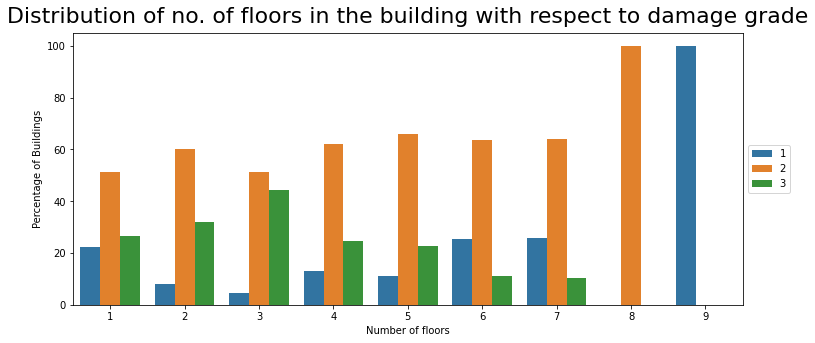

In [112]:
# Calculate counts
df_temp = earthquake_complete.groupby(['count_floors_pre_eq','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['count_floors_pre_eq', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'count_floors_pre_eq', 
                 y = 'count', 
                 hue = 'damage_grade')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of no. of floors in the building with respect to damage grade", y=1.015, fontsize=22);
plt.xlabel("Number of floors")
plt.ylabel("Percentage of Buildings")
plt.show()

# Clean up
del df_temp, ax

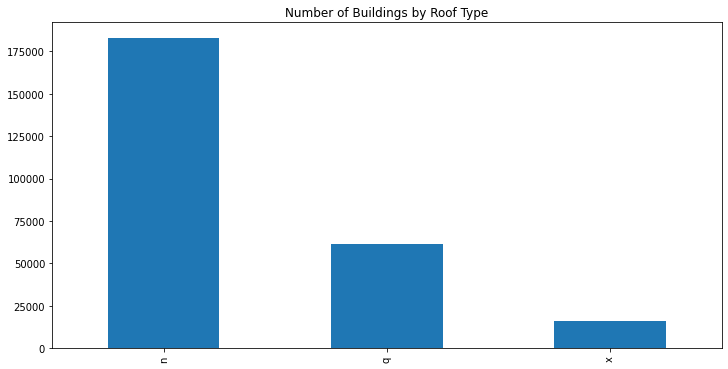

In [113]:
plt.figure(figsize = (12,6))
ax = earthquake_complete.roof_type.value_counts().plot(kind = "bar")
plt.title("Number of Buildings by Roof Type")
plt.show()

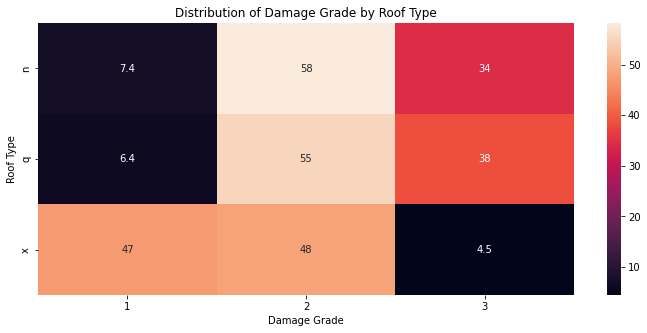

In [114]:
# Calculate counts
df_temp = earthquake_complete.groupby(['roof_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['roof_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['roof_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
#plt.xticks(rotation = 50)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Roof Type")
plt.xlabel("Damage Grade")
plt.ylabel("Roof Type")
plt.show()

# Clean up
#del df_temp, ax

In [115]:
df_temp

damage_grade,1,2,3
roof_type,,,
n,7.409129,58.218024,34.372847
q,6.375861,55.230934,38.393205
x,47.278008,48.217265,4.504727


## From the above graph we can see that roof type x is disproportionately damage grade 1 (47%). Contrast this with the other types that have <10%. This is reinforced further by the fact we could expect only 10% of the data to be damage grade 1

In [116]:
earthquake_complete['damage_grade'].value_counts(normalize=True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

## Higher the number of floors in a building, higher sustainability it have.

# Question 3: Does buildings age play a role in damage grade?

# Value counts of age

In [117]:
earthquake_complete.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
160        6
170        6
175        5
135        5
190        3
145        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

# Value counts of damage grade

In [118]:
earthquake_complete.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

# Correlation of age and damage

In [119]:
cols = ["age", "damage_grade"]
cols

['age', 'damage_grade']

In [120]:
earthquake_complete[cols].corr()

,age,damage_grade
age,1.000000,0.029273
damage_grade,0.029273,1.000000


<AxesSubplot:xlabel='damage_grade', ylabel='age'>

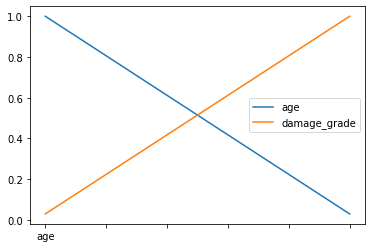

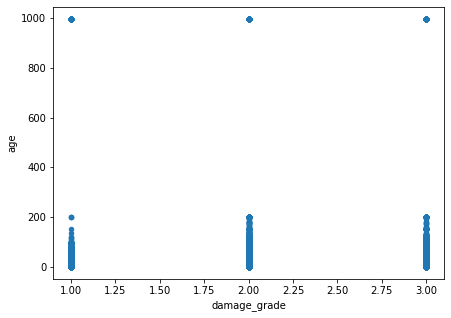

In [121]:
earthquake_complete[cols].corr().plot()
earthquake_complete.plot.scatter(x='damage_grade', y='age', marker='o', figsize=(7,5))

## As per the correlation and scatter plot between 'age' and 'damage_grade', building age does not play a role in damage grade.


# Question 4: Are the engineered or non-engineered structures most affected?

In [122]:
df_re= earthquake_complete.reindex(columns=["has_superstructure_rc_engineered", "has_superstructure_rc_non_engineered", "damage_grade"])
df_re.head()

,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,damage_grade
0,0,0,3
1,0,0,2
2,0,0,3
3,0,0,2
4,0,0,3


In [123]:
df_re = earthquake_complete[earthquake_complete["has_superstructure_rc_engineered"] == 1]
df_gb_rc = df_re.groupby('damage_grade').agg({'has_superstructure_rc_engineered': 'count' })
df_gb_rc

,has_superstructure_rc_engineered
damage_grade,
1,2656
2,1402
3,75


In [124]:
df_re_2 = earthquake_complete[earthquake_complete["has_superstructure_rc_non_engineered"] == 1]
df_gb_n_rc = df_re_2.groupby('damage_grade').agg({'has_superstructure_rc_non_engineered': 'count' })
df_gb_n_rc

,has_superstructure_rc_non_engineered
damage_grade,
1,3857
2,5832
3,1410


In [125]:
df_final = pd.merge(df_gb_rc, df_gb_n_rc, left_index=True, right_index=True)
df_final

,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered
damage_grade,,
1,2656,3857
2,1402,5832
3,75,1410


<AxesSubplot:xlabel='damage_grade'>

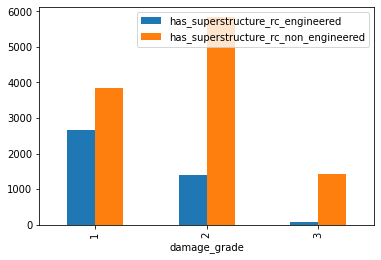

In [126]:
df_final = df_final.reset_index()
df_final.plot(x="damage_grade", y=["has_superstructure_rc_engineered", "has_superstructure_rc_non_engineered"], kind="bar")

## The most intolerant buildings to earthquakes are those who have non-engineered super structure.

# Question 5: Does the superstructure matter in tolerating earthquake?

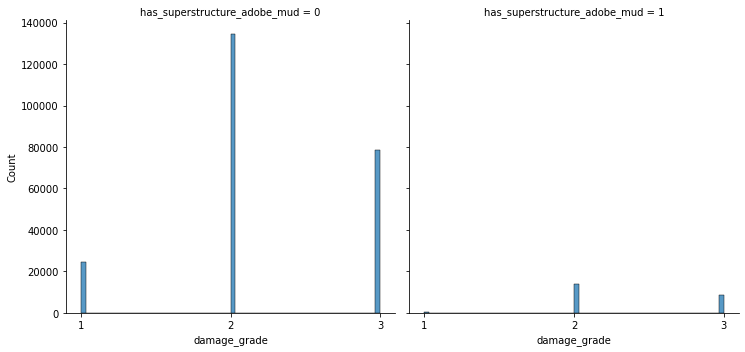

In [127]:
sns.displot(data=earthquake_complete, col='has_superstructure_adobe_mud', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])


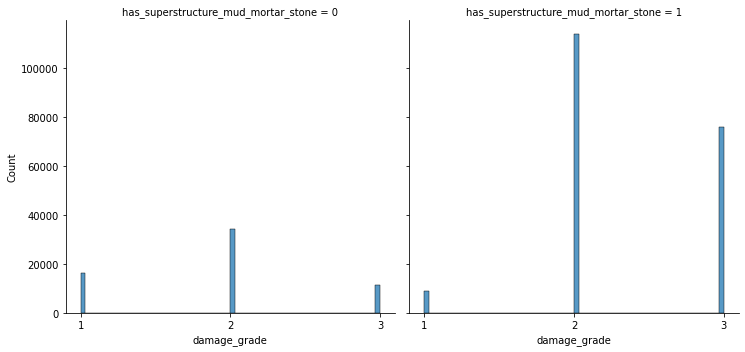

In [128]:
sns.displot(data=earthquake_complete, col='has_superstructure_mud_mortar_stone', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])

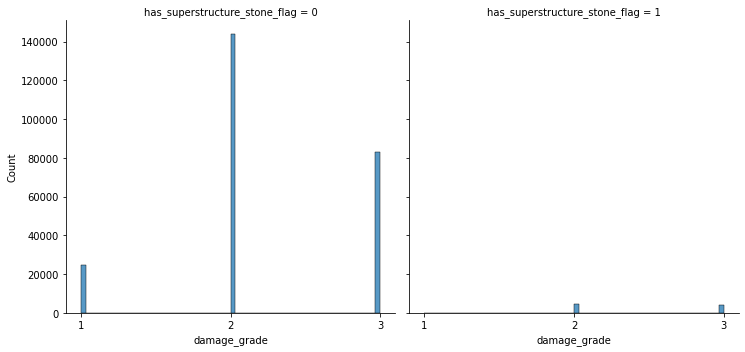

In [129]:
sns.displot(data=earthquake_complete, col='has_superstructure_stone_flag', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])


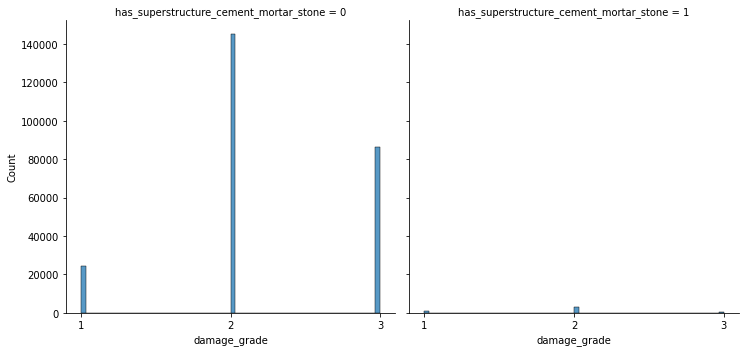

In [130]:
sns.displot(data=earthquake_complete, col='has_superstructure_cement_mortar_stone', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])


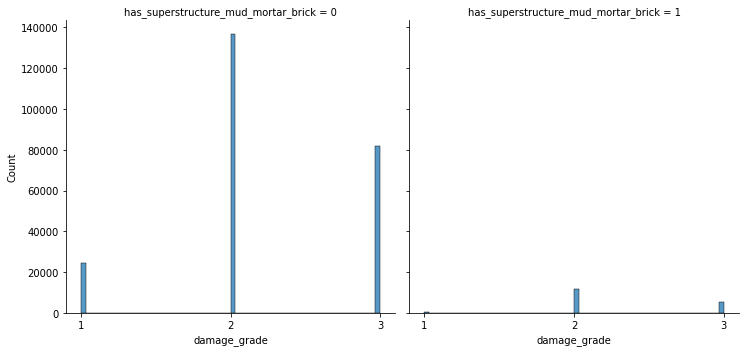

In [131]:
sns.displot(data=earthquake_complete, col='has_superstructure_mud_mortar_brick', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])

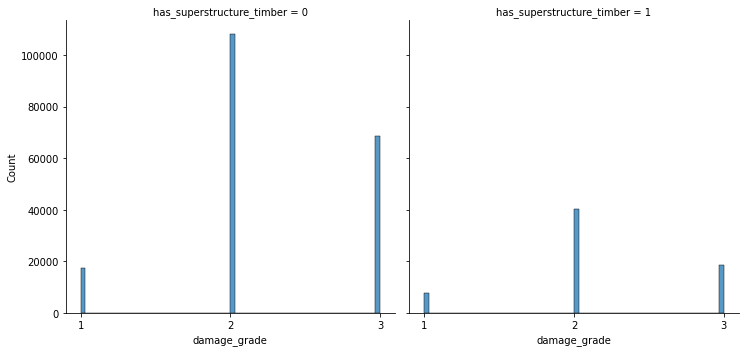

In [132]:
sns.displot(data=earthquake_complete, col='has_superstructure_timber', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])

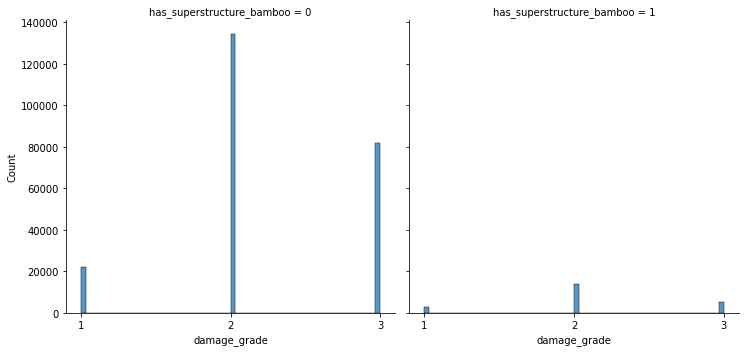

In [133]:
sns.displot(data=earthquake_complete, col='has_superstructure_bamboo', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])

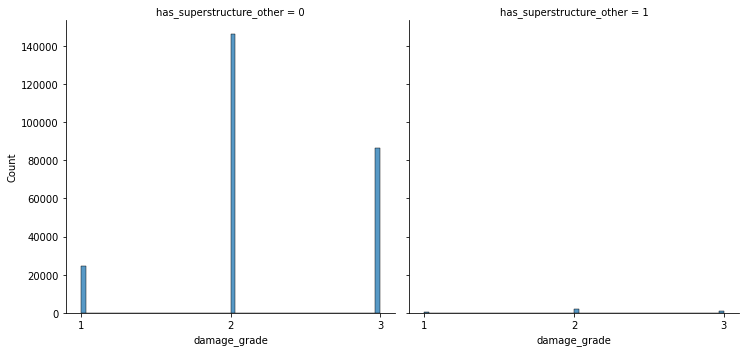

In [134]:
sns.displot(data=earthquake_complete, col='has_superstructure_other', col_wrap=4, x='damage_grade').set(xticks=[1,2,3])

## From the above graphs we come to know that superstructure really matters with the damage grade. The best super structure to use is 'has_super_structure_cement_mortar_stone' whereas the least tolerant is 'has_super_structure_mud_mortar_stone'.

# Question 6: What is the correlation of land surface condition, position, area and height percentage?

In [135]:
# Setting values to our convinence as it is impossible to get the correlation between numerical and categorical values
cleanup_num={"land_surface_condition": {"t": 1, "n": 2, "o":3 },
            "position": {"s": 4, "t": 5, "j": 6, "o": 7 }}

In [136]:
earthquake_complete = earthquake_complete.replace(cleanup_num)
earthquake_complete

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,1,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,3,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,1,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,1,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,1,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,2,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,1,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,1,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,1,r,...,0,0,0,0,0,0,0,0,0,2


In [137]:
earthquake_complete[['area_percentage', 'height_percentage','land_surface_condition','position', 'damage_grade']].corr()['damage_grade']

area_percentage          -0.125221
height_percentage         0.048130
land_surface_condition    0.017386
position                  0.005954
damage_grade              1.000000
Name: damage_grade, dtype: float64

## The correlation shows that the least related is the 'area_percentage' as it does not affect the 'damage_grade' of buildings whereas,'height_percentage' and 'land_surface_condition' have somewhat strong correlation to 'damage_grade' of the buildings highly affected by earthquake.

# Question 7: How many lives are at risk and need immediate response?

In [138]:
family = earthquake_complete[earthquake_complete['damage_grade'] == 3]['count_families'].value_counts()
total = 0
family_df = pd.DataFrame({'family_number': family.index, 'family_count': family.values})
family_df

,family_number,family_count
0,1,76055
1,0,5838
2,2,4444
3,3,695
4,4,138
5,5,36
6,6,10
7,7,2


In [139]:
family_df['total'] = family_df['family_number'] * family_df['family_count']
family_df['total'].sum()

87834

## The total number of people who need immediate response as being the most affected by the earthquake is 87,834.

# Question 8: What geo level has sustained lesser damage?

In [140]:
a = []
b = []
for i in earthquake_complete['geo_level_2_id'].unique():
    df = earthquake_complete[earthquake_complete['geo_level_2_id'] == i]
    a.append(i)
    b.append(df['damage_grade'].mean())

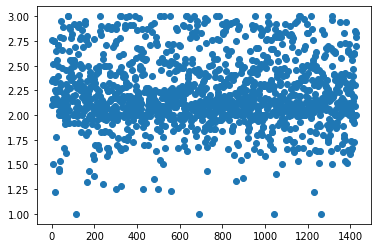

In [141]:
plt.scatter(a,b)

In [142]:
c=[]
d=[]
for i in earthquake_complete['geo_level_3_id'].unique():
    df = earthquake_complete[earthquake_complete['geo_level_3_id'] == i]
    c.append(i)
    d.append(df['damage_grade'].mean())

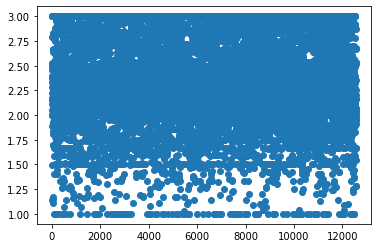

In [143]:
plt.scatter(c,d)

In [144]:
e=[]
f=[]
for i in earthquake_complete['geo_level_1_id'].unique():
    df = earthquake_complete[earthquake_complete['geo_level_1_id'] == i]
    e.append(i)
    f.append(df['damage_grade'].mean())

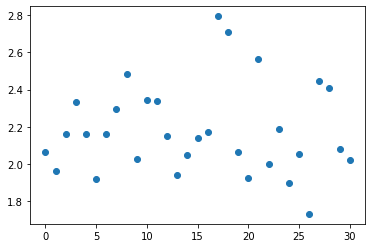

In [145]:
plt.scatter(e,f)

## The scatter plots show that the geo_level_2_id has been the most intolerant to earthquakes as it has attained the most damage grade values, the maximum that is 3. Although the geo_level_3_id has the maximum number of buildings with the damage grade value as 1 but the number of buildings with damage grade value as 3 outweighs the otherwise. 
## The only geo_level_1_id can be declared as the least affected. The most of buildings fall under the average damage grade of 2.6 and the number of buildings is lesser comparitively to the other two.

# Question 9: Are there any buildings that need to be demolished and have legal ownership?

In [146]:
earthquake_complete['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

In [147]:
for i in earthquake_complete['legal_ownership_status'].unique():
    print(i)
    print(earthquake_complete[earthquake_complete['legal_ownership_status'] == i]['damage_grade'].value_counts(normalize = True))

v
2    0.570473
3    0.336795
1    0.092732
Name: damage_grade, dtype: float64
a
2    0.557692
1    0.274129
3    0.168179
Name: damage_grade, dtype: float64
r
2    0.493551
3    0.361847
1    0.144603
Name: damage_grade, dtype: float64
w
2    0.487112
3    0.464326
1    0.048562
Name: damage_grade, dtype: float64


## As its not clear by the categorical values of 'legal_ownership_status' data, one cannot justify which buildings are legally owned. Although assuming the government agencies would be knowing it, an analysis report is presented with correlation of buildings with all three damage_grade values for each type. 
## However, 'w' data-type has most buildings affected by earthquake as values range to 48.7112% for damage_grade valued 2 and 46.4326% for damage_grade valued 3.
## Only 'a' data-type has most number of buildings with percentage 16.8179%.

# Chapter 4 CONCLUSION

# Based on the analysis conducted, its clearly depicted that the tolernce to earthquake depends upon the type of construction materials used in foundation and super structure with keeping in sight the land surface condition and geo level.
